<center style="font-size:160%; color:red; font-family:verdana;">
 Flowers Classification </center>



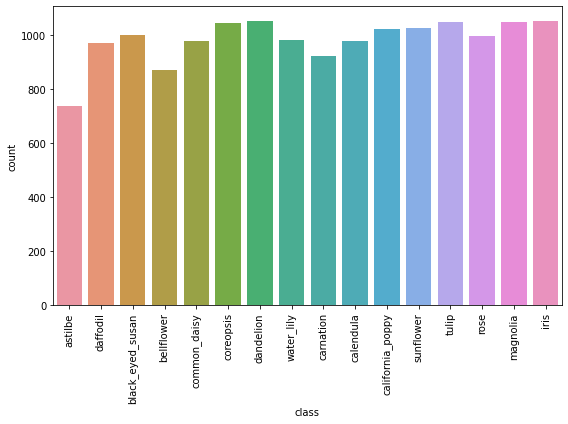

In [ ]:

DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(dir)[x] for x in range(0,16)])
DF['count']=pd.Series([len(os.listdir(os.path.join(dir,os.listdir(dir)[x]))) for x in range(0,16)])
plt.figure(figsize=(8,6))
g=sns.barplot(x='class', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()

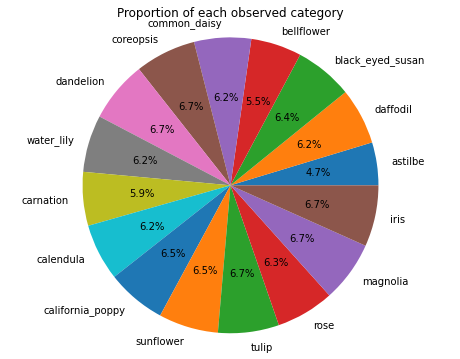

In [9]:
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.pie(DF['count'],
        labels=DF['class'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

The Number of images is similar in each class so the data is almost **balanced** 

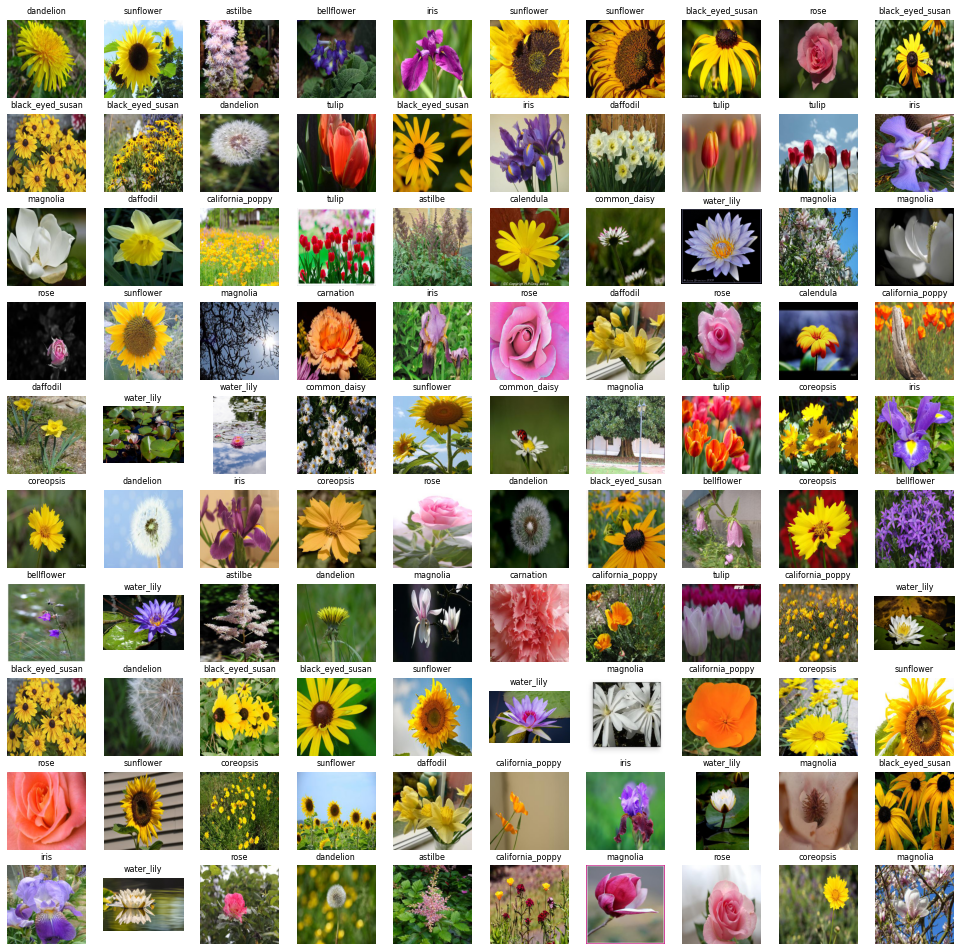

In [ ]:
W = 10
H = 10
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel() 
for i in np.arange(0, W * H): 
    label = random.choice(os.listdir(dir))
    class_dir = os.path.join(dir,label)
    image = random.choice(os.listdir(class_dir))
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(label, fontsize = 8) 
    axes[i].axis('off')


In [ ]:
np.array(img).shape

(256, 256, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rescale = 1.0/255.,
                                  rotation_range=30 ,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  brightness_range=[0.6,1],
                                  fill_mode='nearest',
                                  validation_split=0.2)
train_generator = datagen.flow_from_directory(dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    subset='training' ) 
val_generator = datagen.flow_from_directory(dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150),
                                                    shuffle=False,
                                                    subset='validation' ) 


Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


In [ ]:

train_generator.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'daffodil': 8,
 'dandelion': 9,
 'iris': 10,
 'magnolia': 11,
 'rose': 12,
 'sunflower': 13,
 'tulip': 14,
 'water_lily': 15}

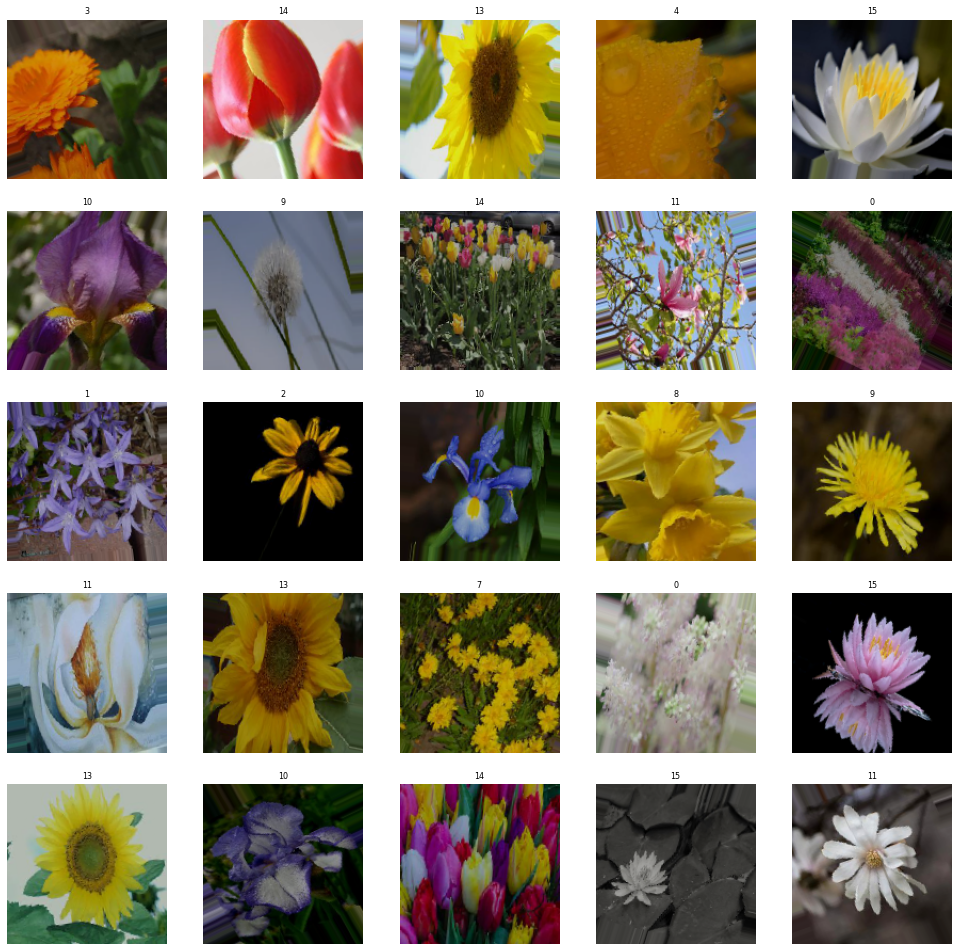

In [ ]:

x_batch, y_batch = next(train_generator)
W = 5
H = 5
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel()
for i in np.arange(0, W * H): 

  
    image = x_batch[i]
    
    axes[i].imshow( image )
    axes[i].set_title(np.argmax(y_batch[i]), fontsize = 8) # the label
    axes[i].axis('off')

In [ ]:

denseNet = tf.keras.applications.DenseNet121( include_top=False,
                                             weights="imagenet",
                                             input_shape=(150, 150, 3))

denseNet.trainable = False

model=tf.keras.models.Sequential()
model.add(denseNet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='softmax'))

2022-05-10 09:34:01.199738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 09:34:01.303675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 09:34:01.304525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 09:34:01.305453: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

29097984/29084464 [==============================] - 0s 0us/step


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8389120   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
Total params: 15,494,352
Trainable params: 8,456,848
Non-trainable params: 7,037,504
_____________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

epoch = 10 
history = model.fit(train_generator, epochs = epoch, validation_data = val_generator, verbose = 1)


2022-05-10 09:34:11.512113: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-05-10 09:34:17.959068: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


394/394 [==============================] - 226s 544ms/step - loss: 1.3557 - accuracy: 0.5998 - val_loss: 0.7319 - val_accuracy: 0.7791
Epoch 2/10
394/394 [==============================] - 126s 319ms/step - loss: 0.7528 - accuracy: 0.7636 - val_loss: 0.6132 - val_accuracy: 0.8131
Epoch 3/10
394/394 [==============================] - 123s 312ms/step - loss: 0.6238 - accuracy: 0.8050 - val_loss: 0.5774 - val_accuracy: 0.8246
Epoch 4/10
394/394 [==============================] - 123s 311ms/step - loss: 0.5382 - accuracy: 0.8297 - val_loss: 0.5773 - val_accuracy: 0.8233
Epoch 5/10
394/394 [==============================] - 123s 312ms/step - loss: 0.4761 - accuracy: 0.8511 - val_loss: 0.6065 - val_accuracy: 0.8364
Epoch 6/10
394/394 [==============================] - 123s 311ms/step - loss: 0.4487 - accuracy: 0.8584 - val_loss: 0.5002 - val_accuracy: 0.8478
Epoch 7/10
394/394 [==============================] - 124s 314ms/step - loss: 0.4071 - accuracy: 0.8715 - val_loss: 0.5809 - val_accura

In [ ]:
def evaluation(history):

    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(acc))
    plt.figure(figsize=(10,6))
    plt.plot  ( epochs,     acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.legend()

    plt.figure(figsize=(10,6))
    plt.plot  ( epochs,     loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )

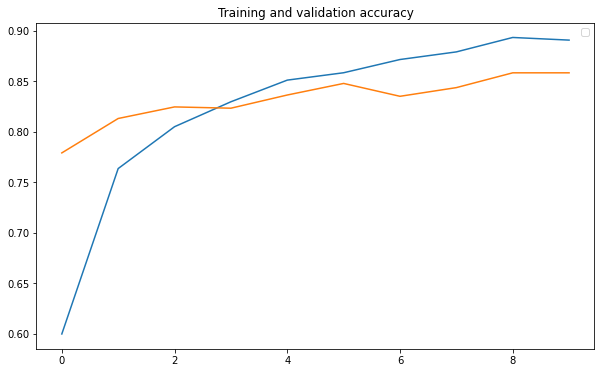

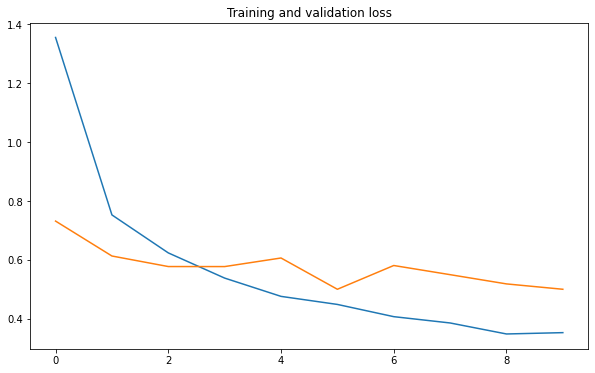

In [19]:
evaluation(history)

99/99 [==============================] - 24s 246ms/step - loss: 0.5083 - accuracy: 0.8542
Confusion Matrix
[[139   3   0   0   0   2   0   0   0   0   0   3   0   0   0   0]
 [  8 129   0   2   7   1   0   0   2   0   9  13   1   0   1   1]
 [  1   0 194   0   0   0   1   3   1   0   0   0   0   0   0   0]
 [  3   1   6 146   9   6   1   4   3   5   0   1   0   7   3   0]
 [  3   1   0   7 175   0   2   0   2   0   1   3   1   1   4   4]
 [ 15   7   0   3   0 142   2   0   1   0   2   9   2   0   0   1]
 [  7   6   0   1   1   4 157   0   1   0   1   1   0   1   6  10]
 [  2   0  15  18   7   0   4 152   8   0   0   1   0   2   0   0]
 [  1   0   0   0   6   0   0   1 185   0   0   1   0   0   0   0]
 [  2   0   0   4   0   0   4   0   0 200   0   0   0   0   0   0]
 [  0  14   0   0   0   1   0   0   2   0 192   1   0   0   0   0]
 [  8   8   0   1   0   4   0   0   1   0   1 181   0   0   0   5]
 [  3   1   0   2   1  21   0   0   1   0   1  11 151   0   7   0]
 [  0   0   0   1   0 

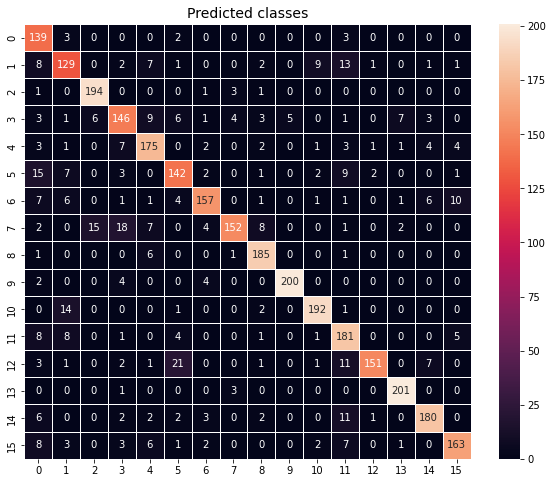

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = model.predict(val_generator)
model.evaluate(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
target_names = ['astilbe','bellflower','black_eyed_susan','calendula','california_poppy','carnation','common_daisy','coreopsis','daffodil',
                'dandelion','iris','magnolia','rose','sunflower','tulip','water_lily']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
sns.heatmap(confusion_matrix(val_generator.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
plt.show()

<p style="background-color:#FFE1FF;color:#9E004F;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid pink;">Fine Tuning </p>

In [57]:
print('Number of layers in the denseNet121 Model : ', len(denseNet.layers))


Number of layers in the denseNet121 Model :  427


In [ ]:

for layer in denseNet.layers[400:]:
    layer.trainable=True

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='loss', patience=5)
epoch = 20 
history = model.fit(train_generator, epochs = epoch, validation_data = val_generator, verbose = 1, callbacks=[earlystop])

Epoch 1/20
394/394 [==============================] - 130s 316ms/step - loss: 0.5059 - accuracy: 0.8456 - val_loss: 0.5411 - val_accuracy: 0.8494
Epoch 2/20
394/394 [==============================] - 121s 306ms/step - loss: 0.4169 - accuracy: 0.8719 - val_loss: 0.5600 - val_accuracy: 0.8583
Epoch 3/20
394/394 [==============================] - 120s 305ms/step - loss: 0.3968 - accuracy: 0.8790 - val_loss: 0.5610 - val_accuracy: 0.8567
Epoch 4/20
394/394 [==============================] - 122s 310ms/step - loss: 0.3890 - accuracy: 0.8798 - val_loss: 0.5534 - val_accuracy: 0.8443
Epoch 5/20
394/394 [==============================] - 121s 306ms/step - loss: 0.3585 - accuracy: 0.8902 - val_loss: 0.6012 - val_accuracy: 0.8405
Epoch 6/20
394/394 [==============================] - 121s 306ms/step - loss: 0.3623 - accuracy: 0.8897 - val_loss: 0.5440 - val_accuracy: 0.8580
Epoch 7/20
394/394 [==============================] - 121s 307ms/step - loss: 0.3383 - accuracy: 0.8950 - val_loss: 0.5888 -

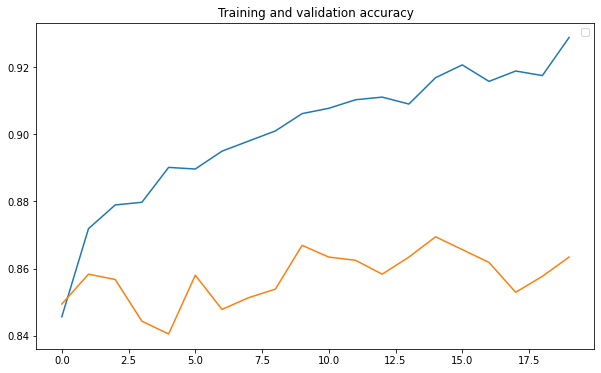

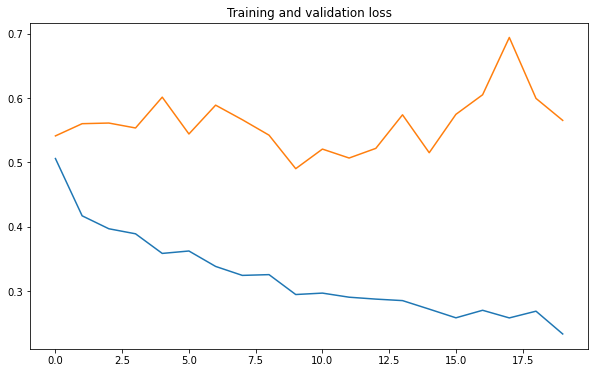

In [60]:
evaluation(history)

99/99 [==============================] - 24s 243ms/step - loss: 0.5740 - accuracy: 0.8580
Confusion Matrix
[[125   4   0   0   2   3   1   0   0   1   1   8   0   0   0   2]
 [  3 135   0   1   3   2   0   0   1   0  15  11   1   0   0   2]
 [  0   0 176   4   0   0   0  12   2   1   0   1   0   3   0   1]
 [  0   1   0 164  11   0   2   5   1   0   0   3   0   0   5   3]
 [  1   1   1   8 176   1   1   0   1   0   2   3   0   0   3   6]
 [  6  12   0   6   2 107   2   0   2   1   9  12  20   1   3   1]
 [  2   1   0   1   0   1 165   0   0   5   2   3   0   1   5  10]
 [  1   1   1  20   8   0   4 161   7   1   0   1   0   1   0   3]
 [  1   0   0   0   3   0   0   1 184   0   1   2   0   0   2   0]
 [  0   0   0   1   0   0   2   0   1 206   0   0   0   0   0   0]
 [  0   9   0   0   0   0   0   0   1   0 199   0   1   0   0   0]
 [  2  10   0   1   2   5   0   0   0   1   1 177   3   0   2   5]
 [  1   1   0   1   2   9   0   0   0   0   2   4 173   0   6   0]
 [  0   0   0   9   0 

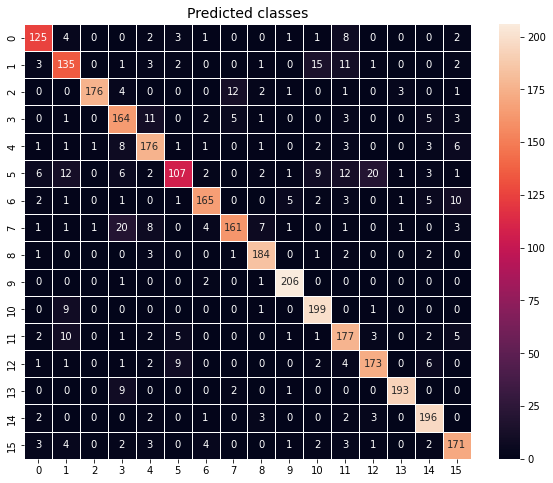

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = model.predict(val_generator)
model.evaluate(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
target_names = ['astilbe','bellflower','black_eyed_susan','calendula','california_poppy','carnation','common_daisy','coreopsis','daffodil',
                'dandelion','iris','magnolia','rose','sunflower','tulip','water_lily']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
sns.heatmap(confusion_matrix(val_generator.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
plt.show()